# 과제: MNIST 데이터를 나만의 NN model로 95 % 이상의 성능으로 training 시켜보자!


## Loading MNIST training data

출처: 19기 DS 정은서님

In [1]:
import tensorflow as tf
from tensorflow import keras

# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scaling(image data는 min-max scaling 주로 사용)
x_train = x_train/255.0
x_test = x_test/255.0

11501568/11490434 [==============================] - 0s 0us/step


## Training Data
28 * 28 pixel 값을 가진 총 60000개의 이미지 데이터

In [2]:
x_train.shape 

(60000, 28, 28)

### Flatten
Neural network 모델에 맞게 이미지 데이터를 벡터 형태로 데이터를 reshape 합니다.  
(Model을 만들 때 *keras.layers.Flatten(input_shape=(28, 28)) 이용해도 됨)

In [3]:
x_train, x_test = x_train.reshape((-1, 28*28)), x_test.reshape((-1, 28*28))
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

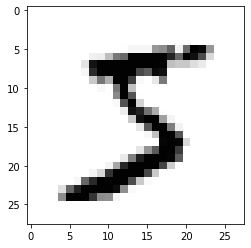

In [4]:
# Hint: x_train[0].reshape()
plt.imshow(x_train[0].reshape(28,28)).set_cmap('Greys')

## Training Labels
이미지 데이터가 나타내는 숫자값을 label로 가지고 있고, 0부터 9까지의 값을 나타냄  
마찬가지로, 60000개의 label이 존재

In [5]:
y_train.shape

(60000,)

In [6]:
# show MNIST label for above data
y_train[0]

5

## 나만의 모델을 tensorflow keras API 를 이용해 만들어 봅시다~

* parameters for model

In [7]:
activation_list = ["sigmoid", "relu", "softmax", "tanh"]

loss_list = ["sparse_categorical_crossentropy",
             "categorical_crossentropy", 
             "binary_crossentropy"]# 이진분류

optimizer_list = ["sgd", "adam", "rmsprop", "adagrad"]

initializer_list = [tf.keras.initializers.RandomNormal(), 
                    tf.keras.initializers.RandomUniform(), 
                    tf.keras.initializers.he_normal(), # resnet
                    tf.keras.initializers.he_uniform(), 
                    tf.keras.initializers.GlorotUniform(), # xavier initialization
                    tf.keras.initializers.GlorotNormal()]

# dropout
dropout_rate = 0.3
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation = "relu"),
    tf.keras.layers.Dense(2, activation = "relu"),
    tf.keras.layers.Dropout(dropout_rate)
])


# regularizer
# regularizer = tf.keras.regularizers.l1(1e-3)
regularizer = tf.keras.regularizers.l2(1e-3)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="relu",
                          activity_regularizer=regularizer)
])

# weight initialization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="relu",
                          kernel_initializer=initializer_list[2])
])

#### My Own Model 

In [8]:
from tensorflow.keras import layers

In [9]:
model = tf.keras.models.Sequential()

In [10]:
# 첫 번째 층
model.add(layers.Dense(128, activation="relu", input_shape=x_train.shape[1:]))

In [11]:
# 두 번째 층
model.add(layers.Dense(512, activation="relu"))

In [12]:
# 세 번째 층 (출력)
model.add(layers.Dense(10, activation="softmax"))

In [13]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 512)               66048     
                                                                 
 dense_6 (Dense)             (None, 10)                5130      
                                                                 
Total params: 171,658
Trainable params: 171,658
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(x_train, y_train, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 8s 2ms/step - loss: 0.2157 - accuracy: 0.9343
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0894 - accuracy: 0.9721
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0635 - accuracy: 0.9795
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0487 - accuracy: 0.9845
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0381 - accuracy: 0.9875
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0312 - accuracy: 0.9898
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0271 - accuracy: 0.9912
Epoch 8/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0232 - accuracy: 0.9925
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0202 - accuracy: 0.9934
Epoch 10/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.021

In [15]:
def plot_history(history):
    plt.figure(figsize = (10,10))
    for e, (item, value) in enumerate(history.history.items()):
        plt.subplot(2,2,e+1)
        plt.plot(value)
        plt.title(item)
    plt.show()

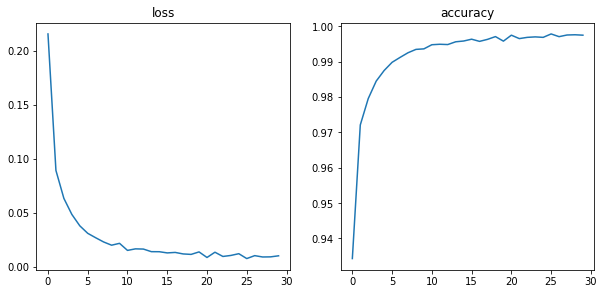

In [16]:
# training accuracy 확인
plot_history(history)

95%이상의 성능을 가진 모델을 만들면 완성!

In [17]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

print('\nAccuracy:', test_acc)

313/313 - 1s - loss: 0.1624 - accuracy: 0.9818 - 699ms/epoch - 2ms/step

Accuracy: 0.9818000197410583


![](https://www.tensorflow.org/versions/master/images/mnist_tensorboard.png)